In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
pathRandom = "C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\EngagementCSV\\Random"
pathAdaptive = "C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\EngagementCSV\\Adaptive\\"


In [4]:
flistRandom = []
flistAdaptive = []

for i in os.listdir(pathRandom):
    if 'Engagement_Raw' in i:
        flistRandom.append(i)
        
        
for i in os.listdir(pathAdaptive):
    if 'Engagement_Raw' in i:
        flistAdaptive.append(i)
        
print(len(flistRandom))
print(len(flistAdaptive))

#AdaptiveP10Engagement_Raw.csv

39
39


In [5]:
def getColumn(flist, column, adaptive):
    total_list = []
    for i in range(len(flist)):
        #print(flist[i])
        if adaptive == True:
            current = pd.read_csv(str(pathAdaptive + '\\' +  flist[i]))
        else:
            current = pd.read_csv(str(pathRandom +'\\'+ flist[i]))
        total_list.append(np.mean(current[column]))
     
    out = np.array(total_list)
    return out

In [47]:
#data = pd.read_csv("C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\EngagementCSV\\Adaptive\\AdaptiveP10Engagement_Raw.csv")

In [6]:
#Adaptive
print('EEG Engagement Mean of Total: ', np.mean(getColumn(flistAdaptive, 'Total', adaptive = True)))
print('Mean of Frontal: ', np.mean(getColumn(flistAdaptive, 'Frontal', adaptive = True)))
print('Mean of Central: ', np.mean(getColumn(flistAdaptive, 'Central', adaptive = True)))
print('Mean of Parietal: ', np.mean(getColumn(flistAdaptive, 'Parietal', adaptive = True)))

EEG Engagement Mean of Total:  1.177808489378455
Mean of Frontal:  1.053733779206811
Mean of Central:  1.2407090312114708
Mean of Parietal:  1.2593740471632948


In [7]:
#random
print('EEG Engagement Mean of Total: ', np.mean(getColumn(flistRandom, 'Total', adaptive = False)))
print('Mean of Frontal: ', np.mean(getColumn(flistRandom, 'Frontal', adaptive = False)))
print('Mean of Central: ', np.mean(getColumn(flistRandom, 'Central', adaptive = False)))
print('Mean of Parietal: ', np.mean(getColumn(flistRandom, 'Parietal', adaptive = False)))

EEG Engagement Mean of Total:  1.1842024360971704
Mean of Frontal:  1.0523292283355847
Mean of Central:  1.2476063820480363
Mean of Parietal:  1.2754947851781309


In [16]:
import scipy
from scipy.stats import wilcoxon

print('EEG Engagement Mean of Random (Total): ', np.mean(getColumn(flistRandom, 'Total', adaptive = False)))
print('EEG Engagement Mean of Adaptive (Total): ', np.mean(getColumn(flistAdaptive, 'Total', adaptive = True)))
print(scipy.stats.wilcoxon(getColumn(flistAdaptive, 'Total', adaptive = True),getColumn(flistRandom, 'Total', adaptive = False), alternative = 'less'))


EEG Engagement Mean of Random (Total):  1.1842024360971704
EEG Engagement Mean of Adaptive (Total):  1.177808489378455
WilcoxonResult(statistic=373.0, pvalue=0.40623725629309887)


In [9]:
print('EEG Engagement Mean of Random (Frontal): ', np.mean(getColumn(flistRandom, 'Frontal', adaptive = False)))
print('EEG Engagement Mean of Adaptive (Frontal): ', np.mean(getColumn(flistAdaptive, 'Frontal', adaptive = True)))
print(scipy.stats.wilcoxon(getColumn(flistAdaptive, 'Frontal', adaptive = True),getColumn(flistRandom, 'Frontal', adaptive = False), alternative = 'greater'))


EEG Engagement Mean of Random (Frontal):  1.0523292283355847
EEG Engagement Mean of Adaptive (Frontal):  1.053733779206811
WilcoxonResult(statistic=416.0, pvalue=0.35836596024642386)


In [10]:
print('EEG Engagement Mean of Random (Central): ', np.mean(getColumn(flistRandom, 'Central', adaptive = False)))
print('EEG Engagement Mean of Adaptive (Central): ', np.mean(getColumn(flistAdaptive, 'Central', adaptive = True)))
print(scipy.stats.wilcoxon(getColumn(flistAdaptive, 'Central', adaptive = True),getColumn(flistRandom, 'Central', adaptive = False), alternative = 'less'))


EEG Engagement Mean of Random (Central):  1.2476063820480363
EEG Engagement Mean of Adaptive (Central):  1.2407090312114708
WilcoxonResult(statistic=364.0, pvalue=0.35836596024642386)


In [14]:
from scipy.stats import ttest_rel



# Perform the paired t-test
statistic, p_value = ttest_rel(centralAdaptive, centralRandom)

# Print the test statistic and p-value
print("Paired t-test statistic:", statistic)
print("p-value:", p_value)

Paired t-test statistic: -0.39185358730865627
p-value: 0.6973554208662978


In [15]:
print('EEG Engagement Mean of Random (Parietal): ', np.mean(getColumn(flistRandom, 'Parietal', adaptive = False)))
print('EEG Engagement Mean of Adaptive (Parietal): ', np.mean(getColumn(flistAdaptive, 'Parietal', adaptive = True)))
print(scipy.stats.wilcoxon(getColumn(flistAdaptive, 'Parietal', adaptive = True),getColumn(flistRandom, 'Parietal', adaptive = False), alternative = 'less'))


EEG Engagement Mean of Random (Parietal):  1.2754947851781309
EEG Engagement Mean of Adaptive (Parietal):  1.2593740471632948
WilcoxonResult(statistic=315.0, pvalue=0.14763631948414918)


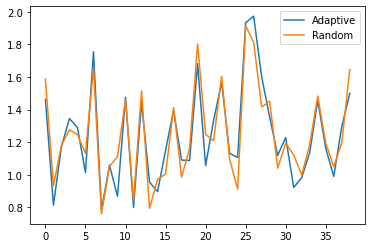

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

centralAdaptive = getColumn(flistAdaptive, 'Central', adaptive = True)
centralRandom = getColumn(flistRandom, 'Central', adaptive = False)
plt.plot(centralAdaptive, label = 'Adaptive')
plt.plot(centralRandom, label = 'Random')
plt.legend()

In [71]:
print(len(centralAdaptive))

39
